#Models without considering Well Bore Code
1. Simple Linear Regression
2. Random Forest regression
3. Lasso Regression
4. Ridge Regression

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
data = pd.read_csv('well_cleaned.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()
model_mse_dict={}
model_R2_dict={}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            5943 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 3   AVG_CHOKE_SIZE_P          5943 non-null   float64
 4   AVG_WHP_P                 5943 non-null   float64
 5   AVG_WHT_P                 5943 non-null   float64
 6   DP_CHOKE_SIZE             5943 non-null   float64
 7   BORE_OIL_VOL              5943 non-null   float64
 8   BORE_GAS_VOL              5943 non-null   float64
 9   BORE_WAT_VOL              5943 non-null   float64
 10  FLOW_KIND                 5943 non-null   object 
 11  WELL_TYPE                 5943 non-null   object 
dtypes: float64(9), object(3)
memory usage: 557.3+ KB


In [29]:
#Keeping all columns except AVG DP TUBING
df1 = data.loc[:,'AVG_CHOKE_SIZE_P':'BORE_WAT_VOL']
df1=df1.drop(['DP_CHOKE_SIZE'], axis=1)
feature_names = df1.columns
df1.head()


,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,43.34,107.36,37.94,631.47,90439.09,0.0
1,47.17,99.19,60.76,1166.46,165720.39,0.0
2,47.73,94.60,63.05,1549.81,221707.31,0.0
3,48.53,89.99,64.55,1248.70,178063.52,0.0
4,49.84,84.78,65.72,1345.78,192602.19,0.0


In [30]:
X = df1
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)

In [31]:
#Create Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Scaling the data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)


LINEAR REGRESSION

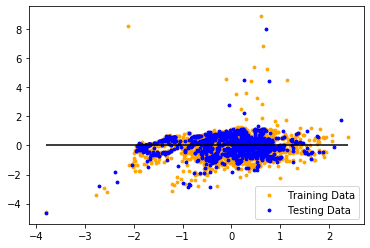

Mean Squared Error (MSE) Train Data: 0.4104764730468125
R-squared (R2) Train Data: 0.5895235269531875
-----------------------------------
Mean Squared Error (MSE) Test Data: 0.41490932151903154
R-squared (R2) Test Data: 0.5781442928698933


In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.preprocessing import StandardScaler
model.fit(X_train_s, y_train_s)


# Plot the Residuals for the Training and Testing data
predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot Residuals
plt.scatter(predictions.reshape(-1,1), predictions.reshape(-1,1) - y_train_s, c= "orange",label="Training Data", s=8)
plt.scatter(predictions1.reshape(-1,1), predictions1.reshape(-1,1) - y_test_s, c= "blue",label="Testing Data",s=8)
#plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.legend()
plt.show()

# Model Scores
# Score the prediction with mse and r2

from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train_s, predictions)
r2_train = r2_score(y_train_s, predictions)
mse_test = mean_squared_error(y_test_s, predictions1)
r2_test = r2_score(y_test_s, predictions1)


model_mse_dict.update(LINEAR_REG = mse_test)
model_R2_dict.update(LINEAR_REG = r2_test)

print(f"Mean Squared Error (MSE) Train Data: {mse_train}")
print(f"R-squared (R2) Train Data: {r2_train}")
print("-----------------------------------")
print(f"Mean Squared Error (MSE) Test Data: {mse_test}")
print(f"R-squared (R2) Test Data: {r2_test}")


RANDOM FOREST REGRESSION

Model:RANDOM FOREST REGRESSION
R2 Score: 0.8126199283669374
Mean Squared Error (MSE): 0.18429462271914593
R-squared (R2 ): 0.8126199283669374


Text(0.5, 1.0, 'Residual Plot')

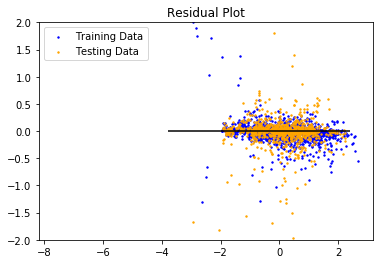

In [34]:
## training the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=100)
rf.fit(X_train_s,y_train_s.ravel())
score = rf.score(X_test_s, y_test_s.ravel())
print("Model:RANDOM FOREST REGRESSION")
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = rf.predict(X_test_s)
mse = mean_squared_error(y_test_s.ravel(), predicted_train)
r2 = r2_score(y_test_s.ravel(), predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RAND_FOR_REG = mse)
model_R2_dict.update(RAND_FOR_REG = r2)

predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot the Residuals for the Training and Testing data
plt.scatter(rf.predict(X_train_s), rf.predict(X_train_s) - y_train_s.ravel(), c="blue", label="Training Data",s=2)
plt.scatter(rf.predict(X_test_s), rf.predict(X_test_s) - y_test_s.ravel(), c="orange", label="Testing Data",s=2)
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.ylim(-2,2)
plt.title("Residual Plot")

In [35]:
importances= rf.feature_importances_
sorted(zip(importances,feature_names),reverse=True)

[(0.33427478987212, 'AVG_WHP_P'),
 (0.2625866185198212, 'AVG_WHT_P'),
 (0.15589502059648044, 'BORE_WAT_VOL'),
 (0.09635440927109541, 'BORE_GAS_VOL'),
 (0.090329578086394, 'AVG_CHOKE_SIZE_P'),
 (0.060559583654088915, 'BORE_OIL_VOL')]

RIDGE REGRESSION

R2 Score: 0.5781779756739883
Mean Squared Error (MSE): 0.41487619334473474
R-squared (R2 ): 0.5781779756739883


Text(0.5, 1.0, 'Residual Plot')

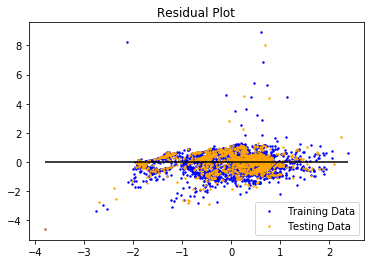

In [37]:
## training the model
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05, normalize=False) #False gives slightly better value
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(RIDGE_REG = mse)
model_R2_dict.update(RIDGE_REG = r2)

predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s, c="blue", label="Training Data",s=2)
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s, c="orange", label="Testing Data",s =2)
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")

In [38]:
importances= model.coef_
sorted(zip(importances[0],feature_names),reverse=True)

[(1.1348855538005445, 'BORE_OIL_VOL'),
 (0.8635634153605024, 'AVG_WHP_P'),
 (0.3419462804988617, 'BORE_WAT_VOL'),
 (0.31985281336616056, 'AVG_CHOKE_SIZE_P'),
 (0.301017124026932, 'AVG_WHT_P'),
 (-1.570476240545254, 'BORE_GAS_VOL')]

LASSO REGRESSION

R2 Score: 0.577877408633938
Mean Squared Error (MSE): 0.41517181116985946
R-squared (R2 ): 0.577877408633938


Text(0.5, 1.0, 'Residual Plot')

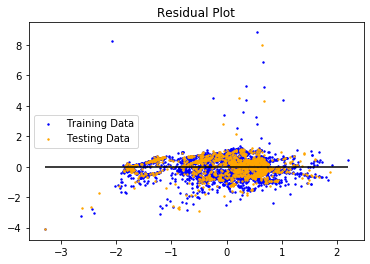

In [45]:
## training the model
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01, normalize=False) #False gives slightly better value
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

model_mse_dict.update(LASSO_REG = mse)
model_R2_dict.update(LASSO_REG = r2)

predictions = model.predict(X_train_s)
predictions1 = model.predict(X_test_s)

# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s.ravel(), c="blue", label="Training Data",s=2)
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s.ravel(), c="orange", label="Testing Data",s=2)
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")

In [42]:
importances= model.coef_
sorted(zip(importances,feature_names),reverse=True)

[(0.8519668194470716, 'AVG_WHP_P'),
 (0.3811997764061222, 'BORE_OIL_VOL'),
 (0.3263488134174493, 'AVG_CHOKE_SIZE_P'),
 (0.31668905692893834, 'BORE_WAT_VOL'),
 (0.30515311064000555, 'AVG_WHT_P'),
 (-0.8168106615395307, 'BORE_GAS_VOL')]

In [43]:
#Displaying the MSE scores by models
model_mse_dict

{'LINEAR_REG': 0.41490932151903154,
 'RAND_FOR_REG': 0.18429462271914593,
 'RIDGE_REG': 0.41487619334473474,
 'LASSO_REG': 0.41430836159489925}

In [44]:
#Displaying the R2 scores by models
model_R2_dict

{'LINEAR_REG': 0.5781442928698933,
 'RAND_FOR_REG': 0.8126199283669374,
 'RIDGE_REG': 0.5781779756739883,
 'LASSO_REG': 0.5787553140270549}